# 1.What is Semantic Segmentation?

Semantic Segmentation is an image analysis procedure in which we classify each pixel in the image into a class.

This is similar to what humans do all the time by default. Whenever we look at something, we try to “segment” what portions of the image into a predefined class/label/category, subconsciously.

# 2. Applications of Semantic Segmentation
The most common use cases for the Semantic Segmentation are:

1. Autonomous Driving


2. Facial Segmentation

3. Indoor Object Segmentation
4. Geo Land Sensing




# 3.1. Input and Output
Before we get started, let us understand the inputs and outputs of the models.

These models expect a 3-channel image (RGB) which is normalized with the Imagenet mean and standard deviation, i.e.
mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]

So, the input dimension is [Ni x Ci x Hi x Wi]
where,

Ni -> the batch size
Ci -> the number of channels (which is 3)
Hi -> the height of the image
Wi -> the width of the image
And the output dimension of the model is [No x Co x Ho x Wo]
where,

No -> is the batch size (same as Ni)
Co -> is the number of classes that the dataset have!
Ho -> the height of the image (which is the same as Hi in almost all cases)
Wo -> the width of the image (which is the same as Wi in almost all cases)
NOTE: The output of torchvision models is an OrderedDict and not a torch.Tensor.During inference (.eval() mode ) the output, which is an OrderedDict has just one key – out. This out key holds the output and the corresponding values are in the shape of [No x Co x Ho x Wo].


PyTorch for Beginners: Semantic Segmentation using torchvision
AvatarArunava Chakraborty
JUNE 5, 2019 8 COMMENTS
Deep Learning Image Processing Machine Learning PyTorch Segmentation Tutorial
Semantic Segmentation using torchvision
This post is part of the series in which we are going to cover the following topics.

1. What is Semantic Segmentation?
Semantic Segmentation is an image analysis procedure in which we classify each pixel in the image into a class.

This is similar to what humans do all the time by default. Whenever we look at something, we try to “segment” what portions of the image into a predefined class/label/category, subconsciously.

Essentially, Semantic Segmentation is the technique through which we can achieve this with computers.3 

You can read more about Segmentation in our post on Image Segmentation.

Let’s focus on the Semantic Segmentation process.

Let’s say we have the following image as input.


 

Source: Pexels
After semantic segmentation, you get the following output:


 

Semantically Segmented Image
As you can see, each pixel in the image is classified to its respective class. For example, the person is one class, the bike is another and the third is the background.

This is, in most simple terms, what Semantic Segmentation is – identifying and separating each of the objects in an image and labelling them accordigly.

2. Applications of Semantic Segmentation
The most common use cases for the Semantic Segmentation are:

2.1. Autonomous Driving

 

Road Scene Semantic Segmentation
Source: CityScapes Dataset
In autonomous driving, the computer driving the car needs to have a good understanding of the road scene in front of it. It is important to segment out objects such as cars, pedestrians, lanes and traffic signs. We cover this application in great detail in our  Deep Learning course with PyTorch.

2.2. Facial Segmentation

 

Facial Segmentation.
Source: https://github.com/massimomauro/FASSEG-repository/blob/master/papers/multiclass_face_segmentation_ICIP2015.pdf
Facial Segmentation is used for segmenting each part of the face into semantically similar regions – lips, eyes etc. This can be useful in many real-world applications. One very interesting application can be virtual make-over.

2.3. Indoor Object Segmentation

 

Indoor Scene Segmentation
Source: http://buildingparser.stanford.edu/dataset.html
Can you guess where is this used? In AR (Augmented Reality) and VR (Virtual Reality). AR applications can segment the entire indoor area to understand the position of chairs, tables, people, wall, and other similar objects, and thus, can place and manipulate virtual objects efficiently.

2.4. Geo Land Sensing

 

Segmentation of Satellite Images.
Source: https://www.sciencedirect.com/science/article/pii/S0924271616305305
Geo Land Sensing is a way of categorising each pixel in satellite images into a category such that we can track the land cover of each area. If there is an area where heavy deforestation takes place then appropriate measures can be taken. There can be many more applications using semantic segmentation on satellite images.

Now that we know a few important applications of segmentation, let us see how to perform semantic segmentation using PyTorch and Torchvision. Here’s a video that will give you glimpse of what’s to come.

http://https://youtu.be/doGyJokDoWM

 

Download Code To easily follow along this tutorial, please download code by clicking on the button below. It’s FREE!

Download Code
3. Semantic Segmentation using torchvision
We will look at two Deep Learning based models for Semantic Segmentation – Fully Convolutional Network ( FCN ) and DeepLab v3. These models have been trained on a subset of COCO Train 2017 dataset which corresponds to the PASCAL VOC dataset. There are a total of 20 categories supported by the models.

You can use the Colab Notebook to follow this tutorial and code.

3.1. Input and Output
Before we get started, let us understand the inputs and outputs of the models.

These models expect a 3-channel image (RGB) which is normalized with the Imagenet mean and standard deviation, i.e.
mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]

So, the input dimension is [Ni x Ci x Hi x Wi]
where,

Ni -> the batch size
Ci -> the number of channels (which is 3)
Hi -> the height of the image
Wi -> the width of the image
And the output dimension of the model is [No x Co x Ho x Wo]
where,

No -> is the batch size (same as Ni)
Co -> is the number of classes that the dataset have!
Ho -> the height of the image (which is the same as Hi in almost all cases)
Wo -> the width of the image (which is the same as Wi in almost all cases)
NOTE: The output of torchvision models is an OrderedDict and not a torch.Tensor.During inference (.eval() mode ) the output, which is an OrderedDict has just one key – out. This out key holds the output and the corresponding values are in the shape of [No x Co x Ho x Wo].

Now, we are ready to play 🙂

# 3.2. FCN with Resnet-101 backbone
FCN – Fully Convolutional Networks are one of the first successful attempts of using Neural Networks for the task of Semantic Segmentation. We cover FCNs and few other models in great detail in our course on Deep Learning with PyTorch. For now, let us see how to use the model in Torchvision.

3.2.1. Load the model
Let’s load up the FCN!




In [ ]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

2021-03-19 05:32:40 URL:https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg [182965/182965] -> "bird.png" [1]


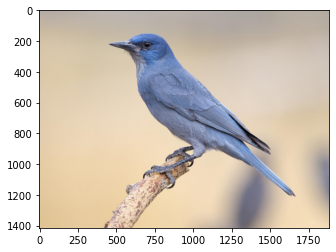

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import torch

!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('./bird.png')
plt.imshow(img); plt.show()

# Pre-process the image
In order to prepare the image to be in the right format for inference using the model, we need to pre-process it and normalize it!
So, for the pre-processing steps, we carry out the following.

Resize the image to (256 x 256)
CenterCrop it to (224 x 224)
Convert it to Tensor – all the values in the image will be scaled so they lie between [0, 1]instead of the original, [0, 255] range.
Normalize it with the Imagenet specific values where mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]
And lastly, we unsqueeze the image dimensions so that it becomes [1 x C x H x W] from [C x H x W]. This is required since we need a batch while passing it through the network.



In [4]:
# Apply the transformations needed
import torchvision.transforms as T
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

In [5]:
# Pass the input through the net
out = fcn(inp)['out']
print (out.shape)


torch.Size([1, 21, 224, 224])


So, out is the final output of the model. As we can see, its shape is [1 x 21 x H x W], as discussed earlier. Since, the model was trained on 21 classes, the output has 21 channels!

Now what we need to do is, make this 21 channelled output into a 2D image or a 1 channel image, where each pixel of that image corresponds to a class!

The 2D image (of shape [H x W]) will have each pixel corresponding to a class label. Note that each (x, y) pixel in this 2D image corresponds to a number between 0 - 20 representing a class.

The question now is how do we get there from the current image with dimensions [1 x 21 x H x W]?

Simple! We take a max index for each pixel position, which represents the class.



In [7]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)

(224, 224)


In [8]:
print (np.unique(om))

[0 3]


As we can observe after processing, we now have a 2D image where each pixel corresponds to a class. The last thing to do is to take this 2D image and convert it into a segmentation map where each class label is converted into an RGB color and thus helping in visualization.

# 3.2.5. Decode Output
We will use the following function to convert this 2D image to an RGB image where each label is mapped to its corresponding color.

In [9]:
# Define the helper function
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

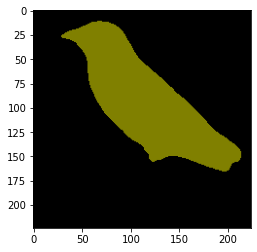

In [10]:
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

In [11]:
def segment(net, path):
  img = Image.open(path)
  plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(256), 
                   T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()

# Let’s see what we are doing inside this function!

First, the variable label_colors stores the colors for each of the classes according to the index. So, the color for the first class which is background is stored at the 0th index of the label_colors list. The second class, which is aeroplane, is stored at index 1 and so on.

Now, we have to create an RGB image from the 2D image we have. So, what we do is that we create empty 2D matrices for all the 3 channels.

So, r, g, and b are arrays which will form the RGB channels for the final image. Each of these arrays is of shape [H x W] (which is the same as the shape of the 2Dimage).

Now, we loop over each class color we stored in label_colors and we obtain the corresponding indexes in the image where that particular class label is present. Then for each channel, we put its corresponding color to those pixels where that class label is present.

Finally, we stack the 3 separate channels together to form a RGB image.

Now, let’s use this function to see the final segmented output!



2021-03-19 05:36:32 URL:https://learnopencv.com/wp-content/uploads/2021/01/horse-segmentation.jpeg [434252/434252] -> "horse.png" [1]


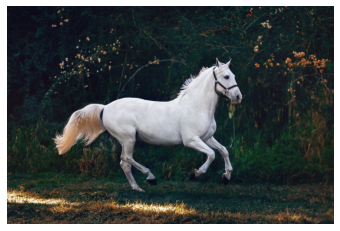

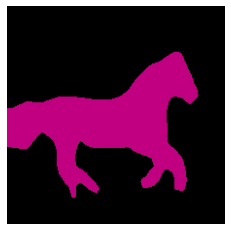

In [12]:
!wget -nv https://www.learnopencv.com/wp-content/uploads/2021/01/horse-segmentation.jpeg -O horse.png
segment(fcn, './horse.png')

# now we can try with the google deep lab 

In [13]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


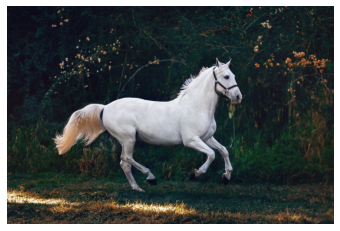

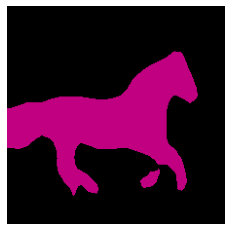

In [14]:
segment(dlab, './horse.png')

# comparing the results with the pytorch segmentation vs the tensorflow deep brain results 

2021-03-19 05:39:06 URL:https://learnopencv.com/wp-content/uploads/2021/01/person-segmentation.jpeg [422242/422242] -> "dog-park.png" [1]


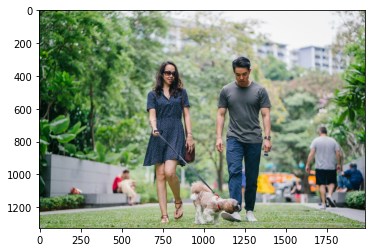

Segmenatation Image on FCN


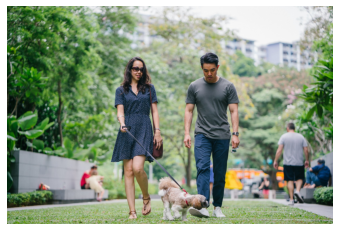

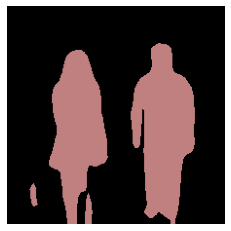

Segmenatation Image on DeepLabv3


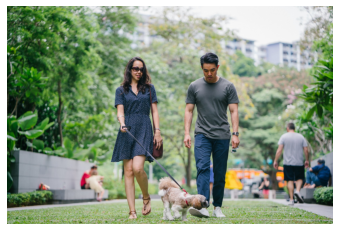

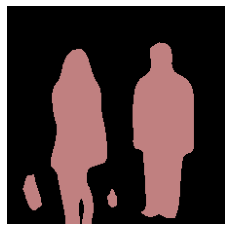

In [17]:
!wget -nv "https://www.learnopencv.com/wp-content/uploads/2021/01/person-segmentation.jpeg" -O dog-park.png
img = Image.open('./dog-park.png')
plt.imshow(img); plt.show()

print ('Segmenatation Image on FCN')
segment(fcn, path='./dog-park.png')

print ('Segmenatation Image on DeepLabv3')
segment(dlab, path='./dog-park.png')